In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
class GridWorld:
    
    def __init__(self):
        self.moves = [  np.array([0, -1]),
                        np.array([0, 1]),
                        np.array([1, 0]),
                        np.array([-1, 0]) 
                     ]
        
        self.A = np.array([0, 1])
        self.A_STATE = np.array([4, 1])
        self.A_REWARD = 10
        self.B = np.array([0, 3])
        self.B_STATE = np.array([2, 3])
        self.B_REWARD = 5
    
    def get_reward(self, state, action):
        if (state==self.A).all():
            return self.A_STATE, self.A_REWARD
        if (state==self.B).all():
            return self.B_STATE, self.B_REWARD
        
        next_state = state + action
        
        if next_state[0] < 0 or next_state[0] > 4 or next_state[1] < 0 or next_state[1] > 4:
            next_state = state
            reward = -1
        
        else:
            reward = 0
            
        return next_state, reward   
        
            
class Agent:
    
    def __init__(self):
        self.value = np.zeros((5,5))

In [3]:
grid = GridWorld()

estimated_value = np.zeros((5,5))
discount = 0.9
runs = 2000

for k in range(runs):
    
    agent = Agent()

    for i in range(5):
        for j in range(5):

            state = np.array([i, j])

            for action in grid.moves:
                
                next_state, reward = grid.get_reward(state, action)
                new_i, new_j = next_state[0], next_state[1] 
                
                agent.value[i, j] += 0.25* (reward + discount*estimated_value[new_i, new_j])
                
    estimated_value = agent.value


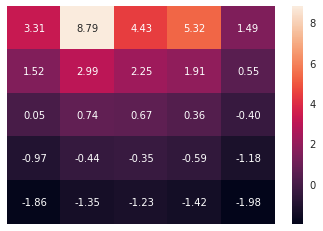

In [4]:
ax = sns.heatmap(estimated_value, annot=True, fmt=".2f")
ax.set_xticks([''])
ax.set_yticks([''])